In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show
import seaborn as sns
from __future__ import division
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from scipy.stats import zscore

In [3]:
data = pd.read_csv("C:/Users/Babe-PC/kerjaan_hadi/buyingintention/problem1/DATA.csv", sep=";")
data.head()

(total_instances, total_features) = data.shape
print "total instance: " + str(total_instances)
print "total fitur: " + str(total_features)

total instance: 259347
total fitur: 30


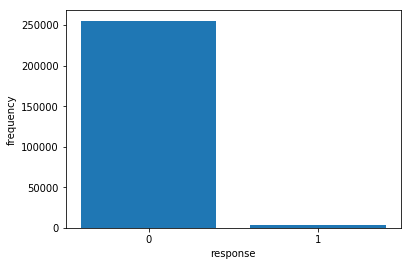

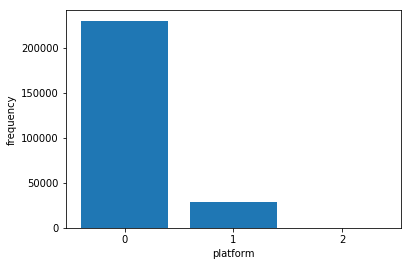

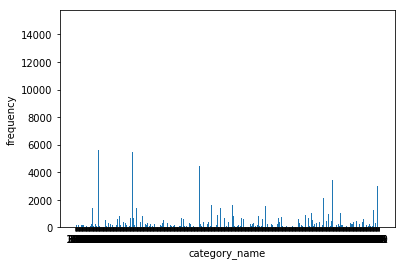

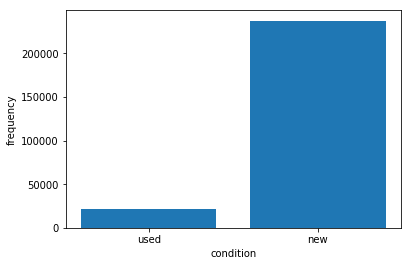

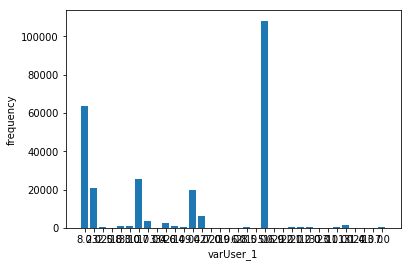

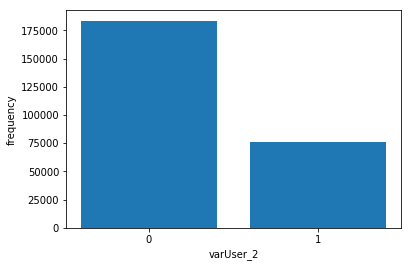

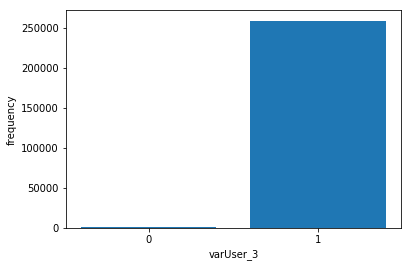

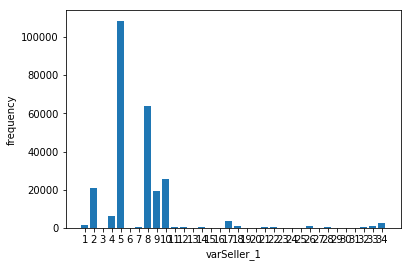

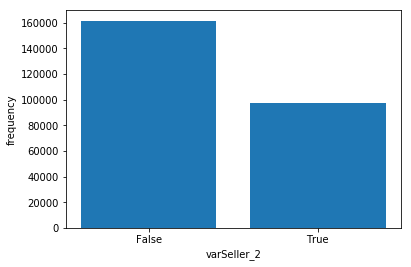

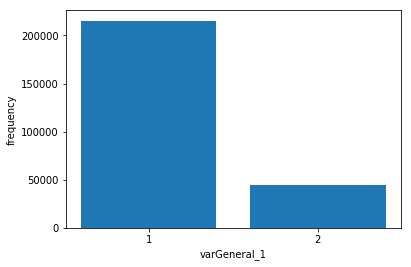

In [4]:
#visualisasi distribusi frekuensi hanya untuk variabel dengan tipe kategorikal
data_plot = data.iloc[:,[0, 1, 2, 3, 11, 12, 13, 15, 16, 17, 19, 22, 26, 27, 29]]
for col in data_plot:
    values = data_plot[col].value_counts(sort=False)
    names = values.keys()
    plt.bar(range(len(names)), values)
    plt.xticks(range(len(values)), names)
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.savefig('{}.png'.format(col))
    plt.show()

Dengan melihat visualisasi distribusi di atas, didapatkan bahwa:
1. Data yang diolah tidak seimbang, yaitu data yang diklasifikasikan sebagai class 0 jauh lebih banyak dibandingkan dengan class 1
2. Terdapat beberapa kategori yang imbalanced seperti variabel platform, condition, varUser_1, varUser_2, varUser_3, varSeller_1, varSeller_2, varSeller_3, varSeller_5, varProduct_3, varProduct_4, dan varGeneral_1

In [5]:
#mengambil data dengan class = 1
data_class_1 = data[data.response == 1]
data_class_1.head()

response  platform  category_name condition  stock  \
45          1         1            300       new      6   
52          1         0            592       new      6   
69          1         0            609       new     10   
112         1         0            251       new      4   
124         1         1            250       new     32   

     free_shipping_coverage_count  courier_count  view_count  \
45                              0             13          59   
52                              0              4           4   
69                              0              3           5   
112                             0              4           4   
124                             0             15         135   

     seller_delivery_response_time  favorite_count      ...       varSeller_6  \
45                        2.333238              29      ...              75.0   
52                        2.960878               0      ...               7.0   
69                             NaN               1      ...               NaN   
112                       3.952670               0      ...              17.0   
124                       2.587856             270      ...              83.0   

     varSeller_7  varSeller_8  varSeller_9  varProduct_1  varProduct_2  \
45         412.0          3.0           30            29            23   
52          28.0          5.0            3             0            16   
69           NaN          NaN            1             1            20   
112          3.0          6.0            5             0            16   
124         37.0          3.0           59           270            18   

     varProduct_3  varProduct_4  varProduct_5  varGeneral_1  
45          False         False           5.0             1  
52          False         False           0.0             2  
69          False         False           0.0             2  
112         False         False           0.0             2  
124         False          True           4.7             1  

[5 rows x 30 columns]

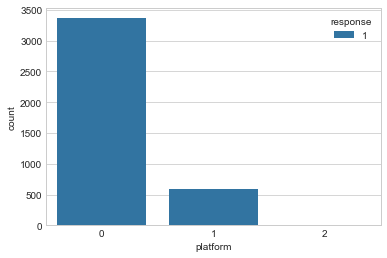

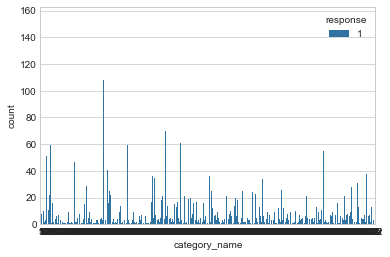

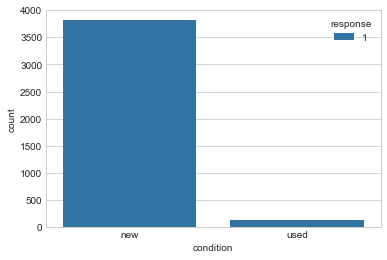

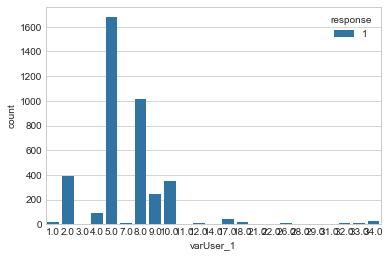

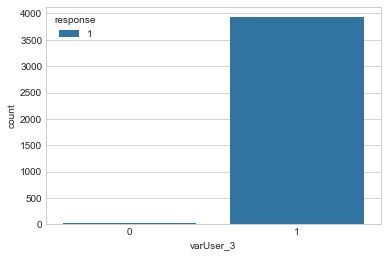

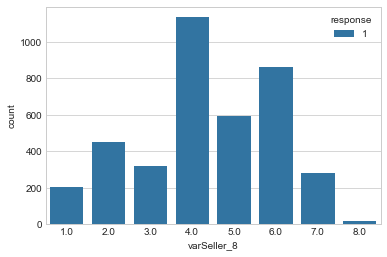

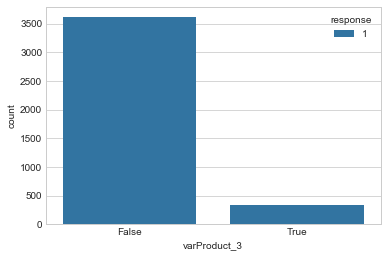

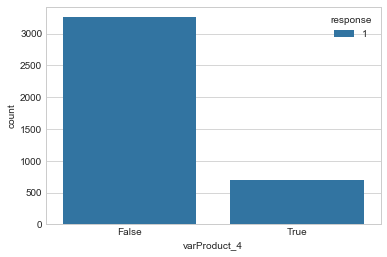

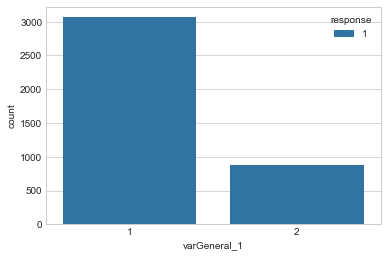

In [6]:
#eksplorasi data kategorikal
sns.set_style("whitegrid")
data_bar_plot = data.iloc[:,[1, 2, 3, 11, 12, 13, 15, 16, 17, 19, 22, 26, 27, 29]]
for col in data_bar_plot:
    countplot = sns.countplot(x=col, hue="response", data=data_class_1)
    show()

In [7]:
for col in data_bar_plot:
    count_series = data_class_1.groupby(['response', col]).size()
    print count_series

response  platform
1         0           3362
          1            584
          2              2
dtype: int64
response  category_name
1         1                 2
          5                 8
          7                21
          8                 5
          9                10
          10                2
          12                4
          13                3
          14               51
          15                7
          16                4
          17               11
          18               22
          19               53
          22               59
          23                1
          24                2
          25               16
          26                2
          27                1
          28               11
          29                4
          31                6
          32                2
          33                1
          34                7
          35               13
          36                1
          37           

In [8]:
for col in data_bar_plot:
    count_series = data_class_1.groupby(['response', col]).size()
    print max(count_series)

3362
155
3813
1677
2919
3929
1687
2206
3109
2208
1134
3610
3258
3066


In [9]:
mode_categorical_name = data.category_name.mode()
print mode_categorical_name

0    262
dtype: int64


Dengan melihat grafik dan perhitungan di atas, didapatkan bahwa dari data sampai pengguna memutuskan untuk membeli, yaitu:
1. Platform yang paling banyak digunakan adalah apps
2. Kategori yang dilihat oleh user dan paling banyak dibeli adalah 262
3. Kondisi barang yang paling banyak dibeli adalah baru

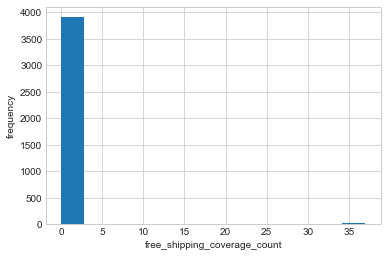

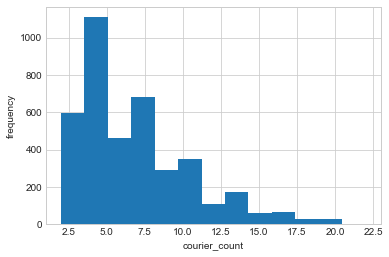

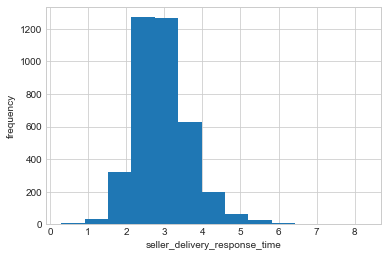

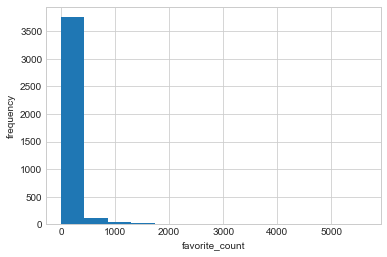

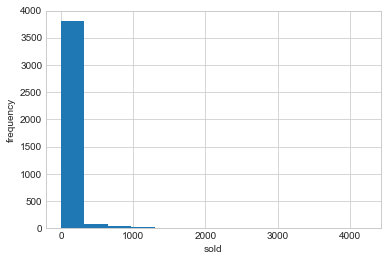

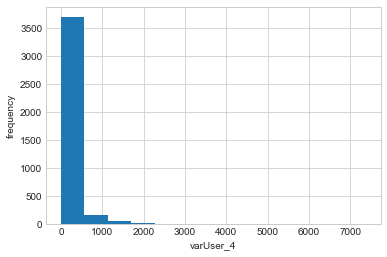

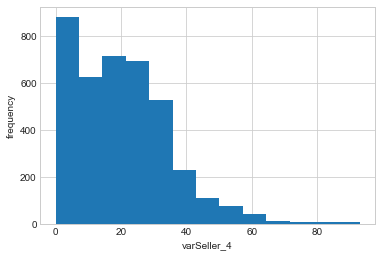

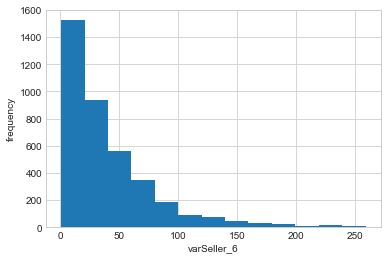

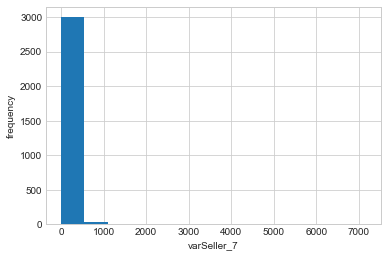

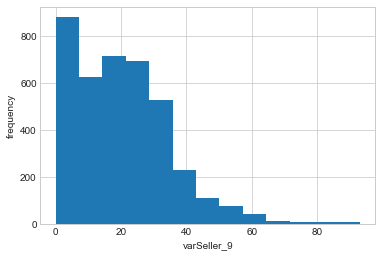

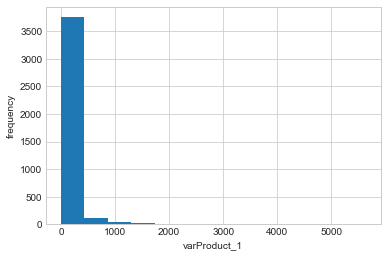

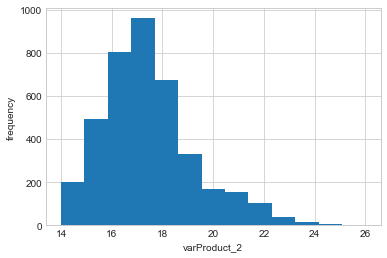

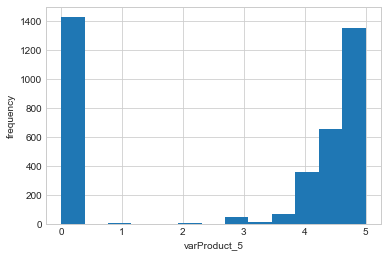

In [10]:
#eksplorasi data numerik
data_hist = data.iloc[:,[4, 5, 6, 7, 8, 9, 10, 14, 18, 20, 21, 23, 24, 25, 28]]
for col in data_hist:
    data_class_1[col].hist(bins='sturges')
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.savefig('{}-HC.png'.format(col))
    plt.show()

Dilihat dari kumpulan histogram di atas, didapatkan bahwa barang dengan:
1. jumlah stok dalam range kurang dari 5000 paling banyak dibeli
2. jumlah area dengan pengiriman barang gratis dalam range kurang dari 5 paling banyak dibeli
3. jumlah pelayanan kurir yang tersedia dalam range antara 2 sampai 5 paling banyak dibeli
4. jumlah view barang dalam range kurang dari 500 paling banyak dibeli
5. waktu sampai barang sampai ke pengguna dalam range 2 sampai 4 paling banyak dibeli
6. banyak pengguna favoritkan dalam range kurang dari 500 paling banyak dibeli
7. jumlah terjual dalam range kurang dari 500 paling banyak dibeli

In [11]:
#menghitung proporsi data berdasarkan response
count_zero_response = len(data[data["response"] == 0])
count_one_response = len(data_class_1)
percentage_zero_response = count_zero_response / total_instances
percentage_one_response = count_one_response / total_instances
print "percentage of zero response is " + str(percentage_zero_response * 100)
print "percentage of one response is " + str(percentage_one_response * 100)

percentage of zero response is 98.4777151847
percentage of one response is 1.52228481532


In [12]:
#melakukan undersampling berdasarkan sumber berikut: https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail

one_indices = np.array(data[data.response==1].index)
zero_indices = np.array(data[data.response==0].index)

In [13]:
def undersample(zero_indices, one_indices):
    random_indices = np.random.choice(zero_indices, len(data[data['response'] == 1]), replace=False)
    under_sample_indices = np.concatenate([one_indices,random_indices])
    under_sample = data.loc[under_sample_indices]
    return under_sample

In [14]:
undersample_data = undersample(zero_indices, one_indices)
(total_instance_sample, feature_sample) = undersample_data.shape
print "the zero response proportion is :" + str(len(undersample_data[undersample_data.response==0])/total_instance_sample)
print "the one response proportion is :" + str(len(undersample_data[undersample_data.response==1])/total_instance_sample)
print "total number of record in resampled data is:" + str(total_instance_sample)

the zero response proportion is :0.5
the one response proportion is :0.5
total number of record in resampled data is:7896


Jumlah instance pada sampel sebanyak 7896, sedangkan jumlah instance pada data secara keseluruhan yaitu 259347. Dari perhitungan dengan menggunakan kalkulator https://www.checkmarket.com/sample-size-calculator/, didapatkan margin of error sebesar 1.43% dengan confidence level 99%. Dengan kata lain, data sampel yang digunakan cukup baik untuk mewakiloi data secara keseluruhan

In [15]:
print "MEAN DATA"
print "------------------------------------"
print data.mean()
print "MEAN UNDER SAMPLE DATA"
print "------------------------------------"
print undersample_data.mean()
print "MEDIAN DATA"
print "------------------------------------"
print data.median()
print "MEDIAN UNDER SAMPLE DATA"
print "------------------------------------"
print undersample_data.median()
print "STANDAR DEVIATION DATA"
print "------------------------------------"
print data.std()
print "STANDAR DEVIATION UNDER SAMPLE DATA"
print "------------------------------------"
print undersample_data.std()

MEAN DATA
------------------------------------
response                           0.015223
platform                           0.111480
category_name                    335.447724
stock                             25.684616
free_shipping_coverage_count       0.368313
courier_count                      6.408526
view_count                        49.340332
seller_delivery_response_time      3.006902
favorite_count                    81.650179
sold                              33.200376
varUser_1                          7.156343
varUser_2                          0.292612
varUser_3                          0.996800
varUser_4                        106.592295
varSeller_1                        7.159601
varSeller_2                        0.377120
varSeller_3                        0.176871
varSeller_4                       19.910961
varSeller_5                        0.589083
varSeller_6                       32.991344
varSeller_7                       85.693526
varSeller_8                  

Dari hasil di atas, didapatkan bahwa hasil pengukuran statistik antara sampling data dengan data secara keseluruhan (mean, median, dan standar deviasi) hampir sama. 

In [16]:
missing_value_total = sum(data.isnull().sum())
print data.isnull().sum()
print missing_value_total

response                             0
platform                             0
category_name                        0
condition                            0
stock                                0
free_shipping_coverage_count         0
courier_count                        0
view_count                           0
seller_delivery_response_time    18976
favorite_count                       0
sold                                 0
varUser_1                          864
varUser_2                            0
varUser_3                            0
varUser_4                            0
varSeller_1                          0
varSeller_2                          0
varSeller_3                          0
varSeller_4                          0
varSeller_5                          0
varSeller_6                      16615
varSeller_7                      71142
varSeller_8                      16615
varSeller_9                          0
varProduct_1                         0
varProduct_2             

Dari perhitungan di atas, didapatkan bahwa banyak missing values yang ditemukan pada data secara keseluruhan, yaitu 124212. 

In [17]:
missing_value_total = sum(undersample_data.isnull().sum())
print undersample_data.isnull().sum()
print missing_value_total

response                            0
platform                            0
category_name                       0
condition                           0
stock                               0
free_shipping_coverage_count        0
courier_count                       0
view_count                          0
seller_delivery_response_time     411
favorite_count                      0
sold                                0
varUser_1                          28
varUser_2                           0
varUser_3                           0
varUser_4                           0
varSeller_1                         0
varSeller_2                         0
varSeller_3                         0
varSeller_4                         0
varSeller_5                         0
varSeller_6                       367
varSeller_7                      1931
varSeller_8                       367
varSeller_9                         0
varProduct_1                        0
varProduct_2                        0
varProduct_3

Dari perhitungan di atas, didapatkan bahwa banyak missing values yang ditemukan pada sampling data, yaitu 3074.

In [18]:
mean_seller_deliv_resp_time = undersample_data['seller_delivery_response_time'].mean()
median_seller_deliv_resp_time = undersample_data['seller_delivery_response_time'].median()
std_seller_deliv_resp_time = undersample_data['seller_delivery_response_time'].std()
cv_seller_deliv_resp_time = std_seller_deliv_resp_time / mean_seller_deliv_resp_time
print "rata-rata atribut seller_delivery_response_time: " + str(mean_seller_deliv_resp_time)
print "median atribut seller_delivery_response_time: " + str(median_seller_deliv_resp_time)
print "standar deviasi atribut seller_delivery_response_time: " + str(std_seller_deliv_resp_time)
print "coefficient of variation atribut seller_delivery_response_time: " + str(cv_seller_deliv_resp_time)
mean_varSeller_6 = undersample_data['varSeller_6'].mean()
median_varSeller_6 = undersample_data['varSeller_6'].median()
std_varSeller_6 = undersample_data['varSeller_6'].median()
cv_varSeller_6 = std_varSeller_6 / mean_varSeller_6
print "rata-rata atribut seller_delivery_response_time: " + str(mean_varSeller_6)
print "median atribut seller_delivery_response_time: " + str(median_varSeller_6)
print "standar deviasi atribut varSeller_6: " + str(std_varSeller_6)
print "coefficient of variation atribut varSeller_6: " + str(cv_varSeller_6)
mean_varSeller_7 = undersample_data['varSeller_7'].mean()
median_varSeller_7 = undersample_data['varSeller_7'].median()
std_varSeller_7 = undersample_data['varSeller_7'].std()
cv_varSeller_7 = std_varSeller_7 / mean_varSeller_7
print "rata-rata atribut seller_delivery_response_time: " + str(mean_varSeller_7)
print "median atribut seller_delivery_response_time: " + str(median_varSeller_7)
print "standar deviasi atribut varSeller_7: " + str(std_varSeller_7)
print "coefficient of variation atribut varSeller_7: " + str(cv_varSeller_7)

rata-rata atribut seller_delivery_response_time: 2.97869553878
median atribut seller_delivery_response_time: 2.88196113784
standar deviasi atribut seller_delivery_response_time: 0.76610853169
coefficient of variation atribut seller_delivery_response_time: 0.257195984523
rata-rata atribut seller_delivery_response_time: 37.0444946208
median atribut seller_delivery_response_time: 25.0
standar deviasi atribut varSeller_6: 25.0
coefficient of variation atribut varSeller_6: 0.674864112897
rata-rata atribut seller_delivery_response_time: 94.2492875105
median atribut seller_delivery_response_time: 26.0
standar deviasi atribut varSeller_7: 338.317720987
coefficient of variation atribut varSeller_7: 3.58960507738


Ketiga atribut di atas merupakan atribut dengan tipe numerik dan memiliki missing values. Berdasarkan nilai coefficient of variation dari ketiga atribut tersebut, maka:
1. digunakan mean sebagai pengisi nilai missing values atribut seller_delivery_response_time dan varSeller_6
2. digunakan median sebagai pengisi nilai missing values atribut varSeller_7

Atribut dengan tipe kategorikal dan memiliki missing values, yaitu varUser_1 dan varSeller_8. Untuk atribut-atribut tersebut akan digunakan modus sebagai pengisi nilai missing values.

In [19]:
#mengisi missing values
undersample_data['seller_delivery_response_time'] = undersample_data['seller_delivery_response_time'].fillna(undersample_data['seller_delivery_response_time'].mean())
undersample_data['varSeller_6'] = undersample_data['varSeller_6'].fillna(undersample_data['varSeller_6'].mean())
undersample_data['varSeller_7'] = undersample_data['varSeller_7'].fillna(undersample_data['varSeller_6'].median())

mode_1 = undersample_data['varUser_1'].mode()
mode_8 = undersample_data['varSeller_8'].mode()
print mode_1
print mode_8
undersample_data['varUser_1'] = undersample_data['varUser_1'].fillna(mode_1[0])
undersample_data['varSeller_8'] = undersample_data['varSeller_8'].fillna(mode_8[0])

0    5.0
dtype: float64
0    4.0
dtype: float64


In [20]:
undersample_data.isnull().sum()

response                         0
platform                         0
category_name                    0
condition                        0
stock                            0
free_shipping_coverage_count     0
courier_count                    0
view_count                       0
seller_delivery_response_time    0
favorite_count                   0
sold                             0
varUser_1                        0
varUser_2                        0
varUser_3                        0
varUser_4                        0
varSeller_1                      0
varSeller_2                      0
varSeller_3                      0
varSeller_4                      0
varSeller_5                      0
varSeller_6                      0
varSeller_7                      0
varSeller_8                      0
varSeller_9                      0
varProduct_1                     0
varProduct_2                     0
varProduct_3                     0
varProduct_4                     0
varProduct_5        

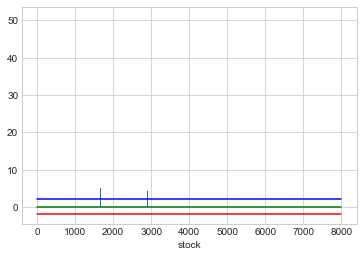

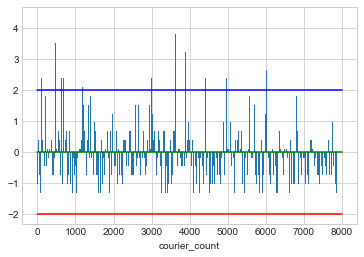

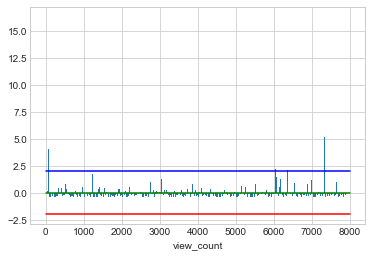

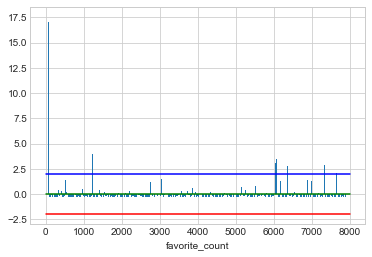

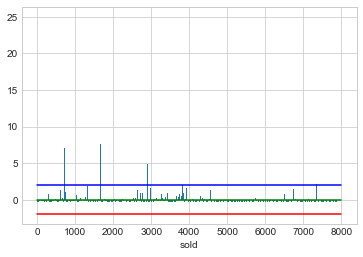

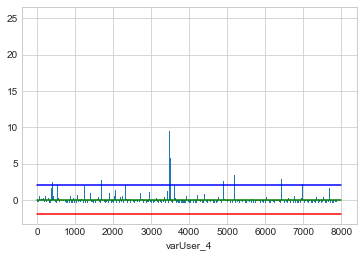

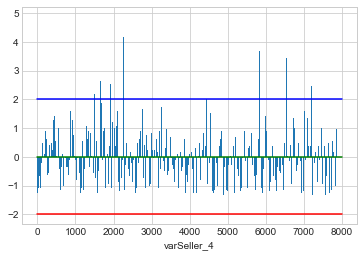

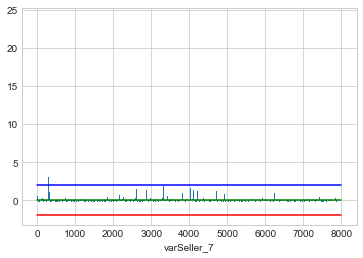

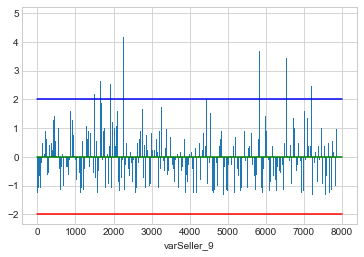

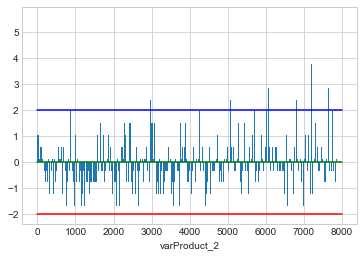

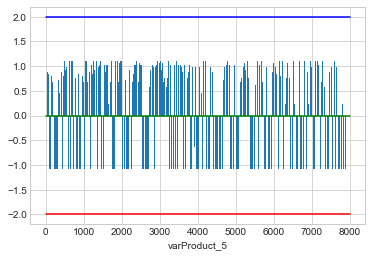

In [22]:
#normalisasi data
list_column_num = list(data_hist.columns)

undersample_data_scaled = undersample_data[list_column_num].apply(zscore)
undersample_data_scaled.head()
for col in undersample_data_scaled:
    y = range(len(undersample_data_scaled[col]))
    x = undersample_data_scaled[col]
    mean = undersample_data_scaled[col].mean()
    std = undersample_data_scaled[col].std()
    plt.bar(y,x)
    plt.xlabel(col)
    plt.plot((0, 8000), (mean, mean), 'g-')
    plt.plot((0, 8000), (mean+2*std,mean+2*std), 'b-')
    plt.plot((0, 8000), (mean-2*std, mean-2*std), 'r-')
    plt.savefig('{}-ZScore.png'.format(col))
    plt.show()

Berdasarkan visualisasi z-score di atas, maka atribut dengan tipe numerik yang memiliki tidak memiliki outlier adalah varProduk_5, sisanya mengandung outlier. Jika diperhatikan kembali, kebanyakan datapoint yang outlier memiliki jarak yang tidak terlalu jauh dari standar deviasi, sehingga masih bisa ditoleransi sebagai bukan outlier.

In [26]:
list_column_cat = list(data_bar_plot.columns)
undersample_data_category = undersample_data[list_column_cat]

undersample_data_final = pd.concat([undersample_data_scaled, undersample_data_category, undersample_data['response']], axis=1)
undersample_data_final.head()

stock  free_shipping_coverage_count  courier_count  view_count  \
45  -0.034022                     -0.103538       1.811051    0.039968   
52  -0.034022                     -0.103538      -0.735760   -0.391993   
69  -0.027565                     -0.103538      -1.018739   -0.384139   
112 -0.037250                     -0.103538      -0.735760   -0.391993   
124  0.007948                     -0.103538       2.377009    0.636861   

     seller_delivery_response_time  favorite_count      sold  varUser_4  \
45                   -8.653942e-01       -0.181296 -0.177436  -0.258725   
52                   -2.388845e-02       -0.270210 -0.267395  -0.283105   
69                   -4.167875e-15       -0.267144 -0.267395  -0.391070   
112                   1.305852e+00       -0.270210 -0.261398   6.031128   
124                  -5.240161e-01        0.557608  0.092441   1.200548   

     varSeller_4  varSeller_6    ...     varUser_3  varSeller_1  varSeller_2  \
45      0.625566     1.036422    ...             1            5         True   
52     -1.137645    -0.820402    ...             1            5        False   
69     -1.268253     0.000000    ...             1            5        False   
112    -1.007036    -0.547339    ...             1            2        False   
124     2.519385     1.254871    ...             1            5         True   

     varSeller_3  varSeller_5  varSeller_8  varProduct_3 varProduct_4  \
45         False            2          3.0         False        False   
52         False            0          5.0         False        False   
69         False            0          4.0         False        False   
112        False            0          6.0         False        False   
124        False            1          3.0         False         True   

     varGeneral_1  response  
45              1         1  
52              2         1  
69              2         1  
112             2         1  
124             1         1  

[5 rows x 30 columns]

In [27]:
undersample_data_final.to_csv("undersample_data_final.csv")

In [28]:
undersample_data_final.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt
.get_cmap('coolwarm'), axis=1)

Berdasarkan gambar di atas, didapatkan bahwa:
1. favorite_count memiliki correlation strength +1 dengan varProduct_1. Keduanya bertipe numerik.
2. varSeller_9 memiliki correlation strength +1 dengan varSeller_4. Keduanya bertipe numerik.
3. varSeller_1 memiliki correlation strength +0.99 dengan varUser_1. Keduanya bertipe kategorikal dan memiliki nilai unik yang sama.

Dengan kata lain: atribut favorite_count redundan dengan atribut varProduct_1, atribut varSeller_9 redundan dengan varSeller_4, dan varSeller_1 redundan dengan varUser_1